In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv("data/advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


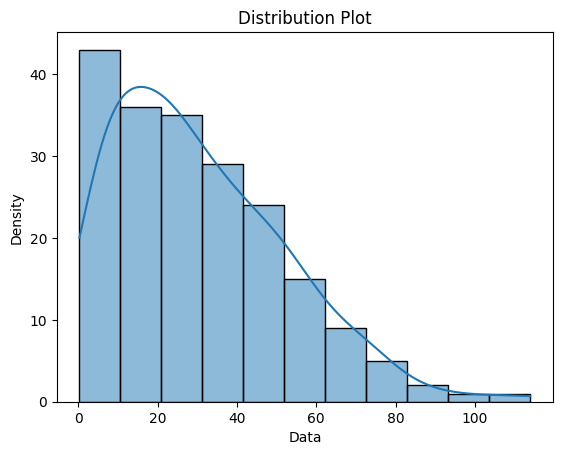

In [24]:
import seaborn as sns
sns.histplot(data["Newspaper"], kde=True)

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Distribution Plot')

# Show the plot
plt.show()

In [25]:
data["newspaper"] = np.log(data["Newspaper"])
data.drop("Newspaper",axis=1,inplace=True)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

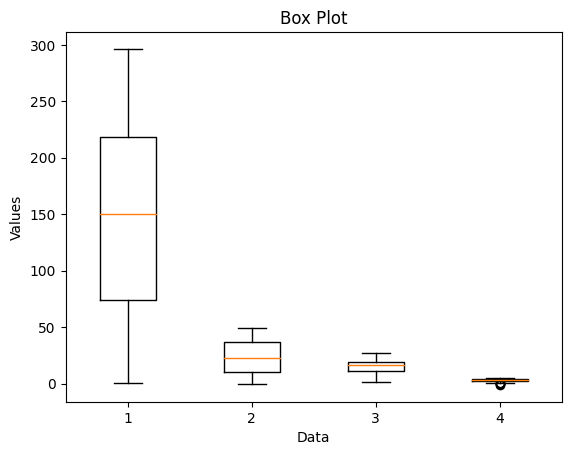

In [27]:
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume you have your data stored in the 'data' DataFrame
# Drop the 'Sales' column from 'data' and assign the remaining columns to 'X'
X = data.drop("Sales", axis=1).values

# Assign the 'Sales' column to 'y'
y = data["Sales"].values
y = y.reshape(-1, 1)
y = y.ravel()

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Further split the train set into train and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# Print the shapes of the resulting datasets
print("Train set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Validation set shapes:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("Test set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Train set shapes:
X_train: (112, 3)
y_train: (112,)
Validation set shapes:
X_val: (48, 3)
y_val: (48,)
Test set shapes:
X_test: (40, 3)
y_test: (40,)


In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the scaling parameters from the training data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data stored in 'X' and 'y'

# Split the data into train, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Create a list of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor())
]

# Loop through each model
for model_name, model in models:
    # Create a pipeline for preprocessing and modeling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('model', model)  # Regression model
    ])

    # Train the model using the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = pipeline.predict(X_val)

    # Calculate R-squared on the validation set
    r2_val = r2_score(y_val, y_pred_val)

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate average cross-validation R-squared
    avg_cv_r2 = np.mean(cv_scores)

    # Make predictions on the test set
    y_pred_test = pipeline.predict(X_test)

    # Calculate R-squared on the test set
    r2_test = r2_score(y_test, y_pred_test)

    # Print the model name and evaluation metrics
    print("Model:", model_name)
    print("Validation Set R-squared:", r2_val)
    print("Average Cross-Validation R-squared:", avg_cv_r2)
    print("Test Set R-squared:", r2_test)
    print("--------------------")


Model: Linear Regression
Validation Set R-squared: 0.7779668119511419
Average Cross-Validation R-squared: 0.8952132056382041
Test Set R-squared: 0.8987146750200748
--------------------
Model: Decision Tree
Validation Set R-squared: 0.8762598883668634
Average Cross-Validation R-squared: 0.8972279316397227
Test Set R-squared: 0.8973175712191476
--------------------
Model: Random Forest
Validation Set R-squared: 0.9374601393406417
Average Cross-Validation R-squared: 0.9298166331674441
Test Set R-squared: 0.9559784983382469
--------------------


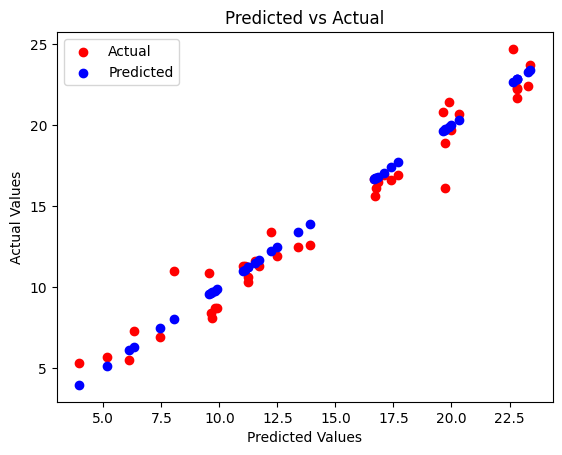

In [31]:
import matplotlib.pyplot as plt

# Plot the predicted values
plt.scatter(y_pred_test, y_test, color='red', label='Actual')

# Plot the actual values
plt.scatter(y_pred_test, y_pred_test, color='blue', label='Predicted')

# Set labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have the dataset stored in a pandas DataFrame called 'data'
# Extract the features from the dataset
X = data[['TV', 'Radio', 'newspaper']].values

# Extract the target variable from the dataset
y = data['Sales'].values

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the entire dataset
model.fit(X, y)

# Create a new data point for prediction
new_data = np.array([[130.1, 35.8, 69.2]])

# Make predictions on the new data point
predictions = model.predict(new_data)

# Print the predicted sales value
print("Predicted Sales:", predictions[0])


Predicted Sales: 19.749514209638775
